In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [10]:
np.random.seed(42)

# parameters
m_train = 1000
m_test = 5000

mu_plus = np.array([0., 2.])
mu_minus = np.array([0., -2.])
Sigma = np.array([[1.5, 0.0],
                  [0.0, 1.5]])

n_train_per_class = m_train // 2
n_test_per_class = m_test // 2

# training sample
X_train_pos = np.random.multivariate_normal(mu_plus, Sigma, size=n_train_per_class)
X_train_neg = np.random.multivariate_normal(mu_minus, Sigma, size=n_train_per_class)

y_train_pos = np.ones(n_train_per_class, dtype=int)      # +1
y_train_neg = -np.ones(n_train_per_class, dtype=int)     # -1

X_train = np.vstack([X_train_pos, X_train_neg])
y_train = np.concatenate([y_train_pos, y_train_neg])

# test sample
X_test_pos = np.random.multivariate_normal(mu_plus, Sigma, size=n_test_per_class)
X_test_neg = np.random.multivariate_normal(mu_minus, Sigma, size=n_test_per_class)

y_test_pos = np.ones(n_test_per_class, dtype=int)
y_test_neg = -np.ones(n_test_per_class, dtype=int)

X_test = np.vstack([X_test_pos, X_test_neg])
y_test = np.concatenate([y_test_pos, y_test_neg])

# samples' permutation
perm_train = np.random.permutation(m_train)
X_train = X_train[perm_train]
y_train = y_train[perm_train]

perm_test = np.random.permutation(m_test)
X_test = X_test[perm_test]
y_test = y_test[perm_test]

X_train.shape, X_test.shape


((1000, 2), (5000, 2))

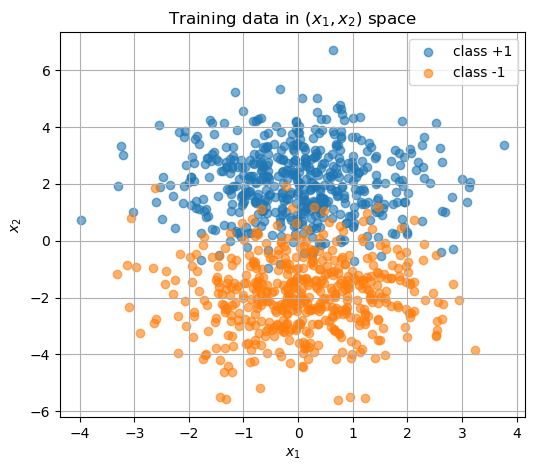

In [12]:
plt.figure(figsize=(6, 5))
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], alpha=0.6, label='class +1')
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], alpha=0.6, label='class -1')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Training data in $(x_1, x_2)$ space')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
ks = [1, 3, 5, 11, 31, 101]

bayes_risks = []
clf_errors = []

# labels to {0,1} for calculation of the probability of class 1 (estimated conditional probability)
y_train01 = (y_train == 1).astype(int)
y_test01 = (y_test == 1).astype(int)

for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train01)
    
    # estimation eta_hat(x) for test: P_hat(Y=1 | X=x)
    eta_hat_test = knn.predict_proba(X_test)[:, 1]

    # Bayes risk
    R_bayes_hat = np.mean(np.minimum(eta_hat_test, 1 - eta_hat_test))
    bayes_risks.append(R_bayes_hat)

    # k-NN classifier and its error
    y_pred01 = (eta_hat_test >= 0.5).astype(int)
    y_pred_pm1 = np.where(y_pred01 == 1, 1, -1)
    
    R_clf_hat = np.mean(y_pred_pm1 != y_test)
    clf_errors.append(R_clf_hat)

bayes_risks, clf_errors

([0.0,
  0.04306666666666666,
  0.04944,
  0.05281818181818181,
  0.05705806451612903,
  0.06666138613861386],
 [0.0796, 0.0582, 0.0562, 0.0522, 0.0514, 0.0494])

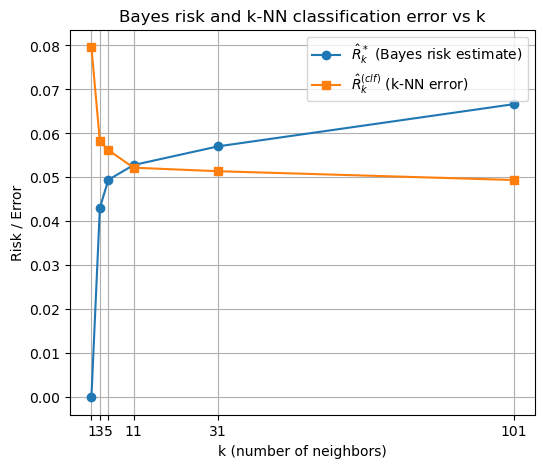

In [26]:
plt.figure(figsize=(6, 5))
plt.plot(ks, bayes_risks, marker='o', label=r'$\hat{R}^*_k$ (Bayes risk estimate)')
plt.plot(ks, clf_errors, marker='s', label=r'$\hat{R}^{(clf)}_k$ (k-NN error)')
plt.xlabel('k (number of neighbors)')
plt.ylabel('Risk / Error')
plt.title('Bayes risk and k-NN classification error vs k')
plt.xticks(ks)
plt.grid(True)
plt.legend()
plt.show()